In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [108]:
df_analysis = pd.read_csv('data\dataset_wout_surf_encoded.csv')
df_analysis.dtypes

bedroomCount                     float64
bathroomCount                    float64
habitableSurface                 float64
toiletCount                      float64
postCode                           int64
totalParkingCount                float64
province_encoded                   int64
type_encoded                       int64
subtype_encoded                    int64
locality_encoded                 float64
epcScore_encoded                 float64
hasAttic_encoded                   int64
hasGarden_encoded                  int64
hasAirConditioning_encoded         int64
hasArmoredDoor_encoded             int64
hasVisiophone_encoded              int64
hasTerrace_encoded                 int64
hasOffice_encoded                  int64
hasSwimmingPool_encoded            int64
hasFireplace_encoded               int64
hasBasement_encoded                int64
hasDressingRoom_encoded            int64
hasDiningRoom_encoded              int64
hasLift_encoded                    int64
hasHeatPump_enco

#### Transforming categorical variables

In [109]:
boolean_cols = df_analysis.columns[df_analysis.columns.str.startswith('has')]
print(boolean_cols)

Index(['hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded'],
      dtype='object')


In [110]:
df_int_cols = df_analysis.select_dtypes(include='int64').columns
encoded_categories = list(set(df_int_cols) - set(boolean_cols))
encoded_categories.append('locality_encoded')
encoded_categories

['province_encoded',
 'subtype_encoded',
 'type_encoded',
 'postCode',
 'locality_encoded']

In [111]:
for col in encoded_categories:
    df_analysis[col]= df_analysis[col].astype("category")

In [112]:
df_analysis.dtypes

bedroomCount                      float64
bathroomCount                     float64
habitableSurface                  float64
toiletCount                       float64
postCode                         category
totalParkingCount                 float64
province_encoded                 category
type_encoded                     category
subtype_encoded                  category
locality_encoded                 category
epcScore_encoded                  float64
hasAttic_encoded                    int64
hasGarden_encoded                   int64
hasAirConditioning_encoded          int64
hasArmoredDoor_encoded              int64
hasVisiophone_encoded               int64
hasTerrace_encoded                  int64
hasOffice_encoded                   int64
hasSwimmingPool_encoded             int64
hasFireplace_encoded                int64
hasBasement_encoded                 int64
hasDressingRoom_encoded             int64
hasDiningRoom_encoded               int64
hasLift_encoded                   

### Linear Regression

#### Creating the variables

In [113]:
df_analysis.columns

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'postCode', 'totalParkingCount', 'province_encoded', 'type_encoded',
       'subtype_encoded', 'locality_encoded', 'epcScore_encoded',
       'hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded', 'price'],
      dtype='object')

In [114]:
y = df_analysis['price']


In [115]:
# Optimal feautures according to  correlation 
X_optimal= df_analysis[
    ['bedroomCount', 
    'bathroomCount',
    'habitableSurface', 
    'toiletCount', 

    'hasOffice_encoded', 
    'hasPhotovoltaicPanels_encoded', 
    'hasHeatPump_encoded', 
    'hasTerrace_encoded',

    'province_encoded',
    'postCode',
    
    'type_encoded',
    'subtype_encoded']
    ]



In [136]:
# All features except locality that seems to add noise
X_complete = df_analysis.drop(columns=['price', 'locality_encoded', 'hasAttic_encoded', 'province_encoded'])


In [137]:
#X = X_optimal
X = X_complete
X.columns

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'postCode', 'totalParkingCount', 'type_encoded', 'subtype_encoded',
       'epcScore_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded'],
      dtype='object')

In [138]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded 

,bedroomCount,bathroomCount,habitableSurface,toiletCount,totalParkingCount,epcScore_encoded,hasGarden_encoded,hasAirConditioning_encoded,hasArmoredDoor_encoded,hasVisiophone_encoded,...,subtype_encoded_15,subtype_encoded_16,subtype_encoded_17,subtype_encoded_18,subtype_encoded_19,subtype_encoded_20,subtype_encoded_21,subtype_encoded_22,subtype_encoded_23,subtype_encoded_24
0,2.0,1.0,100.0,1.0,1.0,5.0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,2.0,1.0,87.0,1.0,0.0,2.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2.0,2.0,104.0,2.0,0.0,6.0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
3,1.0,1.0,71.0,1.0,0.0,3.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2.0,1.0,90.0,1.0,0.0,4.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70195,4.0,2.0,242.0,2.0,3.0,5.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
70196,3.0,1.0,94.0,1.0,0.0,4.0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
70197,3.0,1.0,113.0,1.0,0.0,6.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
70198,3.0,2.0,111.0,2.0,0.0,7.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


#### Splitting the dataset

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#### Fitting the regression

In [140]:
model = LinearRegression()
model.fit(X_train, y_train)
print("TRAINING SET: ")
print("R² Score :", model.score(X_train, y_train))
y_pred = model.predict(X_test)


TRAINING SET: 
R² Score : 0.6442743403665676


In [141]:

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score :", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)



Mean Squared Error: 10007533243.416918
Mean Absolute Error: 73610.3327268613
R² Score : 0.6231486556619111
Intercept: 132572.77923066597


#### Visualizing Results

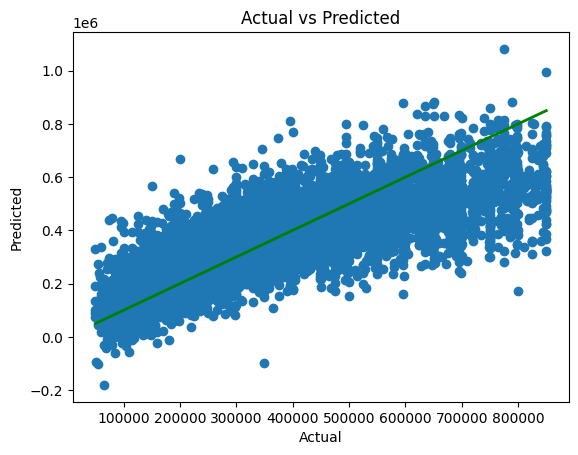

In [122]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

##### Residuals Plot

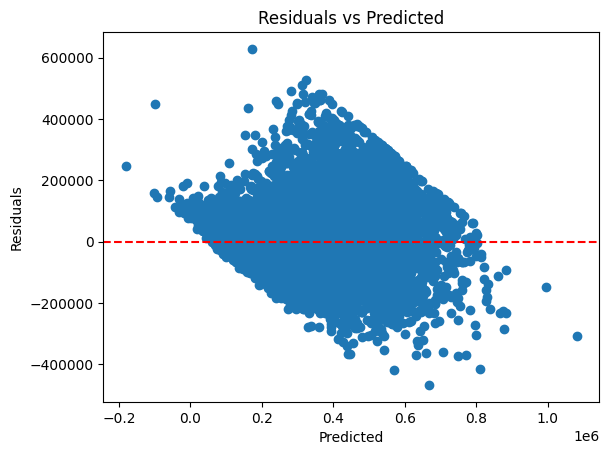

In [123]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

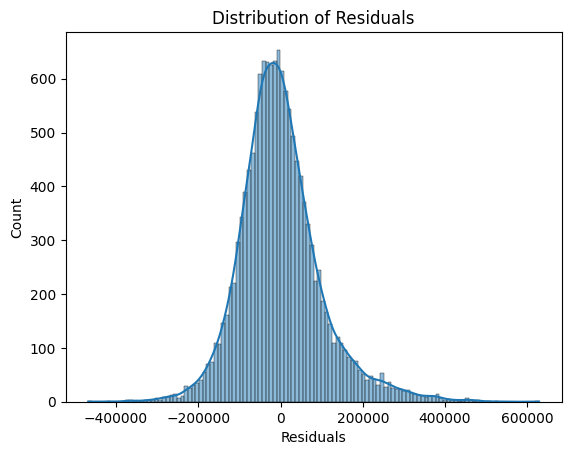

In [124]:
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [ ]:
### Residuals are seen to have a skewed distribution:
##### Residuals are positive at low predicted values

##### Residuals are negative at high predicted values

### Standarizing variables

In [146]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline


In [147]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a pipeline: Standardize features → Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate


print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 73610.33272688815
MSE: 10007533243.42473
R² Score: 0.623148655661617


### Polynomial Regression

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
df_analysis_poly = pd.read_csv('data\dataset_wout_surf_encoded_diff_median.csv')
df_analysis_poly.dtypes


bedroomCount                     float64
bathroomCount                    float64
habitableSurface                 float64
toiletCount                      float64
postCode                           int64
totalParkingCount                float64
province_encoded                   int64
type_encoded                       int64
subtype_encoded                    int64
locality_encoded                 float64
epcScore_encoded                 float64
hasAttic_encoded                   int64
hasGarden_encoded                  int64
hasAirConditioning_encoded         int64
hasArmoredDoor_encoded             int64
hasVisiophone_encoded              int64
hasTerrace_encoded                 int64
hasOffice_encoded                  int64
hasSwimmingPool_encoded            int64
hasFireplace_encoded               int64
hasBasement_encoded                int64
hasDressingRoom_encoded            int64
hasDiningRoom_encoded              int64
hasLift_encoded                    int64
hasHeatPump_enco

In [62]:
y_poly = df_analysis_poly['price']


In [73]:
X_poly = df_analysis_poly.drop(columns = ['price', 'locality_encoded', 'hasAttic_encoded'])
X_poly.dtypes

bedroomCount                     float64
bathroomCount                    float64
habitableSurface                 float64
toiletCount                      float64
postCode                           int64
totalParkingCount                float64
province_encoded                   int64
type_encoded                       int64
subtype_encoded                    int64
epcScore_encoded                 float64
hasGarden_encoded                  int64
hasAirConditioning_encoded         int64
hasArmoredDoor_encoded             int64
hasVisiophone_encoded              int64
hasTerrace_encoded                 int64
hasOffice_encoded                  int64
hasSwimmingPool_encoded            int64
hasFireplace_encoded               int64
hasBasement_encoded                int64
hasDressingRoom_encoded            int64
hasDiningRoom_encoded              int64
hasLift_encoded                    int64
hasHeatPump_encoded                int64
hasPhotovoltaicPanels_encoded      int64
hasLivingRoom_en

In [75]:
boolean_cols = X_poly.columns[X_poly.columns.str.startswith('has')]
print(boolean_cols)

Index(['hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded'],
      dtype='object')


In [76]:
type(boolean_cols)

pandas.core.indexes.base.Index

In [89]:
preprocessor = ColumnTransformer(
    transformers = [
        ('one_hot_encoder', OneHotEncoder(sparse_output= False), list(boolean_cols)),
        ('transformer', PolynomialFeatures(degree=3, include_bias=False), ['habitableSurface'])
    ],
    remainder = 'passthrough'
)

In [90]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression(fit_intercept=True))
])

In [91]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

In [92]:
model_poly = pipeline.fit(X_train_poly, y_train_poly)
print("TRAINING SET: ")
print("R² Score :", model_poly.score(X_train_poly, y_train_poly))
y_pred_poly = model_poly.predict(X_test_poly)

TRAINING SET: 
R² Score : 0.49273911450583674


In [93]:

print("Mean Squared Error:", mean_squared_error(y_test_poly, y_pred_poly))
print("Mean Absolute Error:", mean_absolute_error(y_test_poly, y_pred_poly))
print("R² Score :", r2_score(y_test_poly, y_pred_poly))




Mean Squared Error: 13689697088.119263
Mean Absolute Error: 86154.38551068079
R² Score : 0.4844902709034109


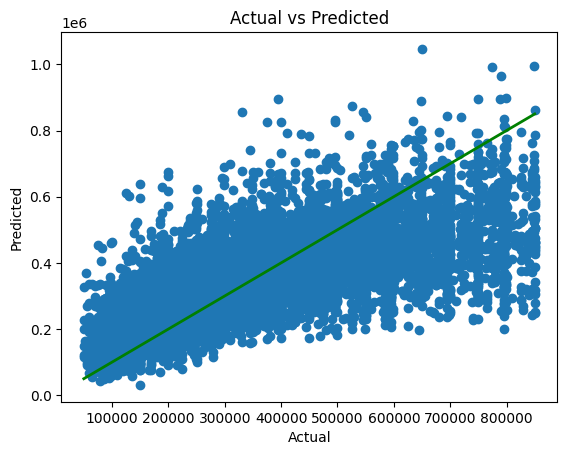

In [86]:

plt.scatter(y_test_poly, y_pred_poly)
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


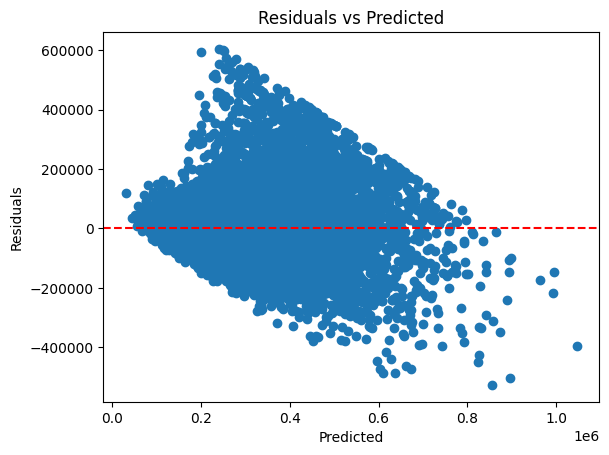

In [87]:
residuals_poly = y_test_poly - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


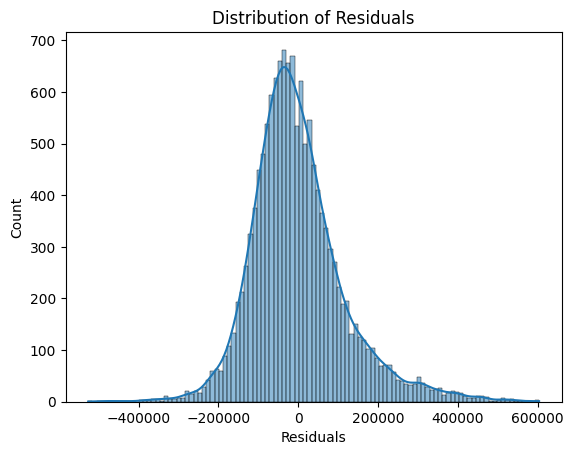

In [88]:
import seaborn as sns
sns.histplot(residuals_poly, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

### RandomForest Regressor

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_regressor = RandomForestRegressor(n_estimators=50, random_state=42, oob_score=True)
forest_regressor.fit(X_train, y_train)
print("Random Forest Regression")
print("TRAINING SET: ")
print("R² Score :", forest_regressor.score(X_train, y_train))


Random Forest Regression
TRAINING SET: 
R² Score : 0.9445797487480578


In [161]:
print("OOB Score: ", forest_regressor.oob_score_)
y_pred_forest = forest_regressor.predict(X_test)

OOB Score:  0.6143622061632192


In [173]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_forest))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_forest))
print("R² Score :", r2_score(y_test, y_pred_forest))


Mean Squared Error: 10393204960.715942
Mean Absolute Error: 70900.60328027203
R² Score : 0.6086255057904956


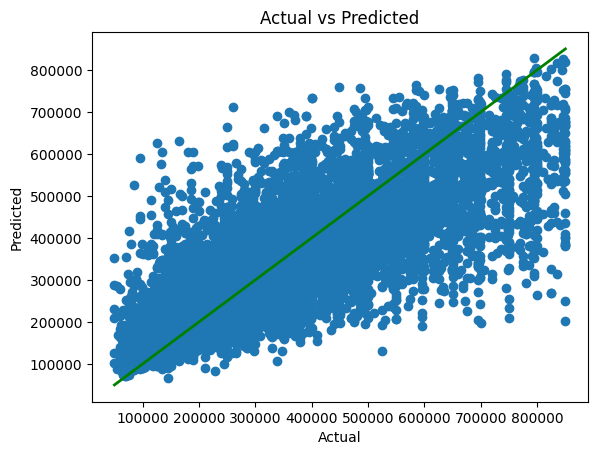

In [157]:
plt.scatter(y_test, y_pred_forest)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Gradient Boosting

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

In [164]:
X_encoded.dtypes

bedroomCount          float64
bathroomCount         float64
habitableSurface      float64
toiletCount           float64
totalParkingCount     float64
                       ...   
subtype_encoded_20       bool
subtype_encoded_21       bool
subtype_encoded_22       bool
subtype_encoded_23       bool
subtype_encoded_24       bool
Length: 1138, dtype: object

In [165]:
X_train, X_test, y_train, y_test

(       bedroomCount  bathroomCount  habitableSurface  toiletCount  \
 47022           3.0            1.0             140.0          2.0   
 22124           2.0            1.0             109.0          1.0   
 64894           2.0            1.0             135.0          1.0   
 6631            1.0            1.0              84.0          1.0   
 33321           3.0            2.0             146.0          2.0   
 ...             ...            ...               ...          ...   
 37194           2.0            1.0             177.0          1.0   
 6265            3.0            2.0             174.0          2.0   
 54886           6.0            1.0             140.0          2.0   
 860             3.0            1.0             163.0          1.0   
 15795           4.0            3.0             397.0          3.0   
 
        totalParkingCount  epcScore_encoded  hasGarden_encoded  \
 47022                0.0               1.0                  0   
 22124                1.0 

In [166]:

params = {
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [167]:
grad_boost_reg = GradientBoostingRegressor(**params)
grad_boost_reg.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.01
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [ ]:
print("Gradient Boost Regression")
print("TRAINING SET: ")
print("R² Score :", grad_boost_reg.score(X_train, y_train))  # review this


Gradient Boost Regression
TRAINING SET: 
R² Score : 0.3711932502916131


In [176]:
y_pred_grad_boost = grad_boost_reg.predict(X_test)

In [177]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_grad_boost))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_grad_boost))
print("R² Score :", r2_score(y_test, y_pred_grad_boost))

Mean Squared Error: 16796665435.449118
Mean Absolute Error: 99694.23972315286
R² Score : 0.367491888781887


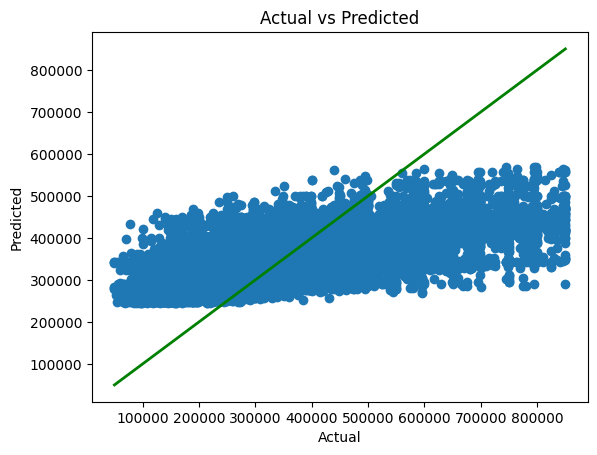

In [178]:
plt.scatter(y_test, y_pred_grad_boost)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()